In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Artificial Neurons 

Billions of neurons in our brain form a neural network through which our brain makes decisions. Similarly, an Artificial Neural Network is simply a collection of artificial neurons arranged in layers, where the outputs of some neurons become the inputs to others.
The phrase "neural network" can refer to the networks of neurons found in our brains (Biological Neural Networks or BNNs) or, in the context of machine learning (ML), to Artificial Neural Networks (ANNs). We usually drop the term "artificial" and simply call them neural networks, with the understanding that we are referring to the ML context.

You saw what a neuron in our brain looks like. In this section, we will introduce some of the commonly used artificial neurons. 

## The Perceptron

One of the most fundamental artificial neuron is the *perceptron*. Perceptrons were developed in 1957 by Frank Rosenblatt. Take a look at the diagram below:

```{image} ./perceptron.png
:name: fig-perceptron
```
*Figure: Structure of a Perceptron*

The input layer of a perceptron, just like the dendrites of a neuron that receive input signals, can take several inputs $x_1, x_2, ..., x_m$. These inputs may be any real numbers. Depending on the importance of each of these inputs, they are assigned corresponding weights $w_1, w_2, ..., w_m$. The weights can also be any real numbers: a positive weight represents an excitatory influence, a negative weight represents an inhibitory influence, and a zero weight indicates no effect. The perceptron then calculates a weighted sum of the inputs: $z = \sum_{i = 1}^{m} w_i x_i = w_1x_1 + w_2x_2+ ... + w_mx_m$. This value is fed into an activation function $g$ that compares it to a threshold value to produce a binary output:

$$\text{output} = \begin{cases}
0, & \text{if } \sum_{i = 1}^{m} w_i x_i \le \text{threshold} \\
1,  & \text{if } \sum_{i = 1}^{m} w_i x_i > \text{threshold}
\end{cases}$$

Another way to put this is 

$$\text{output} = \begin{cases}
0, & \text{if } w_0 + \sum_{i = 1}^{m} w_i x_i \le 0 \\
1,  & \text{if } w_0 + \sum_{i = 1}^{m} w_i x_i > 0
\end{cases}$$

with $w_0 = - \text{threshold}$. 

The above rewriting is only for the simplification of notation, which greatly simplifies the mathematics when we have several such layers together. The term $w_0$ is called the **bias** term. Just as biological neurons have different firing thresholds, the bias term controls how easily a perceptron activates. Think of the bias as a measure of how easy it is for a perceptron to output $1$. If the bias has a big positive value, it is extremely easy for $w_0 + \sum_{i = 1}^{m} w_i x_i$ to exceed the threshold (zero) and thus output $1$. However, if the bias is very negative, then it is difficult for the perceptron to activate.

Let us consider a simple example with binary inputs to understand the working of a perceptron. Say you want to classify an email as spam or not spam. You decide to consider three factors to make that decision: $x_1 =$ whether the email contains the word "lottery", $x_2 =$ whether the email has more than two links, and $x_3 =$ whether the sender is unknown. Each of these inputs $x_1, x_2,$ and $x_3$ takes the value $0$ for "No" or $1$ for "Yes".

Let us say you believe that the word "lottery" in the email is more indicative of spam than the factor of having more than two links, which in turn is more indicative than whether the sender is unknown. Based on this reasoning, we assign the weights $w_1 = 0.6$, $w_2 = 0.4$, and $w_3 = 0.3$, and a bias of $w_0 = -0.5$. So, if the weighted sum exceeds $0$, then we will get the output that the email is indeed spam. Let us say we receive an email that does not have the word "lottery", has more than two links, and is from an unknown sender. Then:

$$w_0 + w_1x_1 + w_2x_2 + w_3x_3 = -0.5 + 0.6 \times 0 + 0.4 \times 1 + 0.3 \times 1 = 0.2 > 0$$

```{image} ./example_perceptron.png
:name: fig-perceptron-spam
```
*Figure: Perceptron as a spam filter*

Thus, the email will be classified as spam. This example reveals an interesting property of how the perceptron makes decisions. With these particular weights and bias, any email containing the word "lottery" will automatically be classified as spam. However, if "lottery" is absent, then the email must have both more than two links *and* an unknown sender to be classified as spam.


## The Sigmoid Neuron

Another common type of artificial neuron is *The Sigmoid Neuron*. Just like a perceptron, the sigmoid neuron has inputs $x_i$'s, weights $w_i$'s and a bias term $w_0$. However, the output of a sigmoid neuron need not be binary ($0$ or $1$). Instead of applying a step function as the activation function, we use the *sigmoid function* which is defined by:

$$
\sigma(z) = \dfrac{1}{1 + e^{-z}}
$$. 

Let us visualize how the sigmoid function looks:

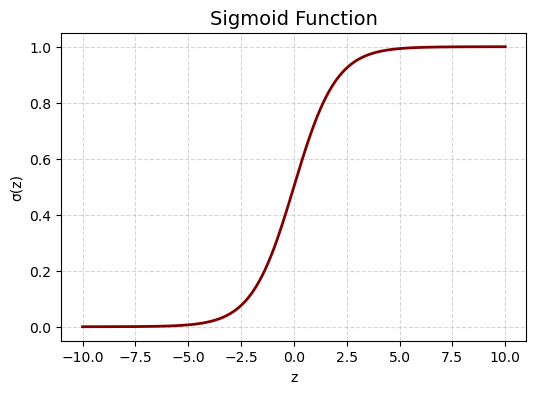

In [2]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input values
z = np.linspace(-10, 10, 400)  # from -10 to 10

# Compute sigmoid outputs
y = sigmoid(z)

# Plot
plt.figure(figsize=(6,4))
plt.plot(z, y, color = '#800000', linewidth=2)
plt.title('Sigmoid Function', fontsize=14)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Does it remind of you a function you have already seen? Yes, the logistic function used in logistic regression! It is the same exact idea here. 

The output of a sigmoid neuron with inputs $x_i$'s and weights $w_i$'s and bias $w_0$ is: 

$$\dfrac{1}{1 + e^{-(w_0 + \sum_{i = 1} w_i x_i)}}$$

The sigmoid function "squashes" any input value into the range $[0,1]$. When the value of the weighted sum $z = w_0 + w_1x_1 + w_2x_2 + ... + w_mx_m$ is a large positive the number, the output of the sigmoid neuron, $\sigma(z)$, approaches 1. Conversely, when the weighted sum $z$ is a large negative number, the output approaches 0.

So far we have seen two kinds of activation functions: the step function, and the sigmoid function. There are other activation functions too, for example:

- **Hyperbolic Tangent function**: Its mathematical formula is given by:
  
$$
f(z) = \tanh(z) = \dfrac{2}{1 + e^{-2z}} - 1 = 2 \times \sigma(2z) - 1
$$

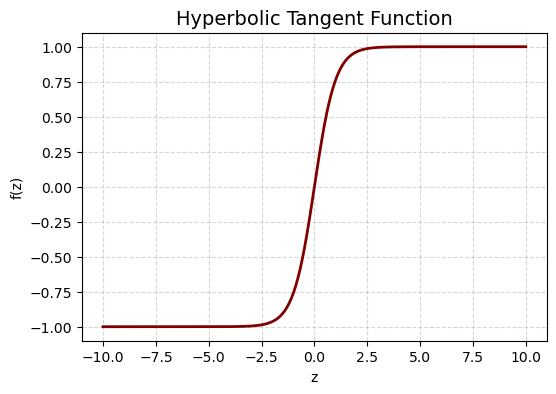

In [3]:
# Generate input values
z = np.linspace(-10, 10, 400)  # from -10 to 10

# Compute the outputs
y = np.tanh(z)

# Plot
plt.figure(figsize=(6,4))
plt.plot(z, y, color = '#800000', linewidth=2)
plt.title('Hyperbolic Tangent Function', fontsize=14)
plt.xlabel('z')
plt.ylabel('f(z)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Hyperbolic tangent function looks similar to the sigmoid function but it stretches along the $y$-axis. The output values are centered around $0$ and ranges from $-1$ to $1$. 

- **Rectified Linear Unit (ReLU) function**: Its mathematical formula is given by: 

$$
f(z) = \max(0,z)
$$

The ReLU function is basically the identity function $f(z) = z$ for all the positive values $z$ and is a constant function $f(z) = 0$ for all non-positive values $z$. 

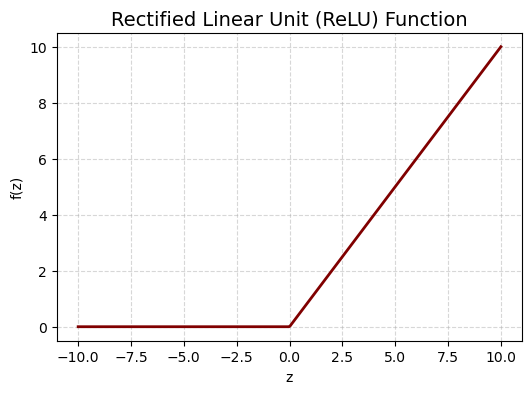

In [4]:
# Generate input values
z = np.linspace(-10, 10, 400) # from -10 to 10

# Generate output values
y = [max(0, x) for x in z]

# Plot
plt.figure(figsize=(6,4))
plt.plot(z, y, color = '#800000', linewidth=2)
plt.title('Rectified Linear Unit (ReLU) Function', fontsize=14)
plt.xlabel('z')
plt.ylabel('f(z)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

:::{note}
**Can activation functions be linear?**

Theoretically, yes. But if a neuron uses a linear activation function, its output is just a linear combination of its inputs. Even if you stack multiple such neurons together (neural network), the result is still a linear function, essentially the same as applying linear regression to the inputs.

The world around us is highly non-linear, and real-world data often requires curved or complex decision boundaries. Non-linear activation functions introduce non-linearity at the neuron level, allowing the neuron to model more complex patterns than a simple linear function could. 
:::